In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('glass1_minority_train.csv',index=False)
df_min=pd.read_csv('glass1_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('glass1_majority_train.csv',index=False)
df_majority=pd.read_csv('glass1_majority_train.csv')

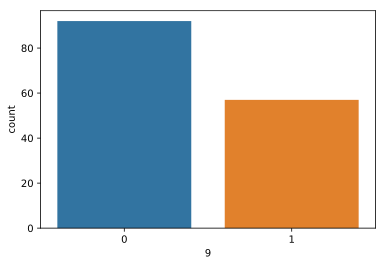

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(51, 5, 10)
(51, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
30/30 [==============================] - 3s 97ms/step - loss: 0.2679
Epoch 2/500
30/30 [==============================] - 0s 535us/step - loss: 0.2620
Epoch 3/500
30/30 [==============================] - 0s 635us/step - loss: 0.2553
Epoch 4/500
30/30 [==============================] - 0s 769us/step - loss: 0.2484
Epoch 5/500
30/30 [==============================] - 0s 769us/step - loss: 0.2415
Epoch 6/500
30/30 [==============================] - 0s 802us/step - loss: 0.2346
Epoch 7/500
30/30 [==============================] - 0s 769us/step - loss: 0.2277
Epoch 8/500
30/30 [==============================] - 0s 836us/step - loss: 0.2210
Epoch 9/500
30/30 [==============================] - 0s 702us/step - loss: 0.2143
Epoch 10/500
30/30 [==============================] - 0s 869us/step - loss: 0.2078
Epoch 11/500
30/30 [==============================] - 0s 702us/step - loss: 0.2014
Epoch 12/500
30/30 [==============================] - 0s 802us/step - loss: 0.1951
Epoch 13/500
3

Epoch 100/500
30/30 [==============================] - 0s 852us/step - loss: 0.0384
Epoch 101/500
30/30 [==============================] - 0s 836us/step - loss: 0.0383
Epoch 102/500
30/30 [==============================] - 0s 869us/step - loss: 0.0383
Epoch 103/500
30/30 [==============================] - 0s 936us/step - loss: 0.0383
Epoch 104/500
30/30 [==============================] - 0s 902us/step - loss: 0.0382
Epoch 105/500
30/30 [==============================] - 0s 799us/step - loss: 0.0382
Epoch 106/500
30/30 [==============================] - 0s 769us/step - loss: 0.0381
Epoch 107/500
30/30 [==============================] - 0s 836us/step - loss: 0.0381
Epoch 108/500
30/30 [==============================] - 0s 752us/step - loss: 0.0381
Epoch 109/500
30/30 [==============================] - 0s 801us/step - loss: 0.0380
Epoch 110/500
30/30 [==============================] - 0s 702us/step - loss: 0.0380
Epoch 111/500
30/30 [==============================] - 0s 819us/step - loss:

Epoch 198/500
30/30 [==============================] - 0s 735us/step - loss: 0.0352
Epoch 199/500
30/30 [==============================] - 0s 568us/step - loss: 0.0351
Epoch 200/500
30/30 [==============================] - 0s 568us/step - loss: 0.0351
Epoch 201/500
30/30 [==============================] - 0s 702us/step - loss: 0.0351
Epoch 202/500
30/30 [==============================] - 0s 966us/step - loss: 0.0350
Epoch 203/500
30/30 [==============================] - 0s 819us/step - loss: 0.0350
Epoch 204/500
30/30 [==============================] - 0s 769us/step - loss: 0.0350
Epoch 205/500
30/30 [==============================] - 0s 852us/step - loss: 0.0349
Epoch 206/500
30/30 [==============================] - 0s 785us/step - loss: 0.0349
Epoch 207/500
30/30 [==============================] - 0s 936us/step - loss: 0.0349
Epoch 208/500
30/30 [==============================] - 0s 969us/step - loss: 0.0349
Epoch 209/500
30/30 [==============================] - 0s 852us/step - loss:

Epoch 296/500
30/30 [==============================] - 0s 635us/step - loss: 0.0322
Epoch 297/500
30/30 [==============================] - 0s 635us/step - loss: 0.0322
Epoch 298/500
30/30 [==============================] - 0s 668us/step - loss: 0.0322
Epoch 299/500
30/30 [==============================] - 0s 836us/step - loss: 0.0321
Epoch 300/500
30/30 [==============================] - 0s 735us/step - loss: 0.0321
Epoch 301/500
30/30 [==============================] - 0s 844us/step - loss: 0.0321
Epoch 302/500
30/30 [==============================] - 0s 735us/step - loss: 0.0320
Epoch 303/500
30/30 [==============================] - 0s 852us/step - loss: 0.0320
Epoch 304/500
30/30 [==============================] - 0s 752us/step - loss: 0.0320
Epoch 305/500
30/30 [==============================] - 0s 752us/step - loss: 0.0319
Epoch 306/500
30/30 [==============================] - 0s 735us/step - loss: 0.0319
Epoch 307/500
30/30 [==============================] - 0s 702us/step - loss:

Epoch 394/500
30/30 [==============================] - 0s 702us/step - loss: 0.0282
Epoch 395/500
30/30 [==============================] - 0s 668us/step - loss: 0.0282
Epoch 396/500
30/30 [==============================] - 0s 802us/step - loss: 0.0281
Epoch 397/500
30/30 [==============================] - 0s 758us/step - loss: 0.0280
Epoch 398/500
30/30 [==============================] - 0s 719us/step - loss: 0.0280
Epoch 399/500
30/30 [==============================] - 0s 702us/step - loss: 0.0279
Epoch 400/500
30/30 [==============================] - 0s 769us/step - loss: 0.0279
Epoch 401/500
30/30 [==============================] - 0s 802us/step - loss: 0.0278
Epoch 402/500
30/30 [==============================] - 0s 835us/step - loss: 0.0277
Epoch 403/500
30/30 [==============================] - 0s 719us/step - loss: 0.0277
Epoch 404/500
30/30 [==============================] - 0s 785us/step - loss: 0.0276
Epoch 405/500
30/30 [==============================] - 0s 719us/step - loss:

Epoch 492/500
30/30 [==============================] - 0s 802us/step - loss: 0.0203
Epoch 493/500
30/30 [==============================] - 0s 585us/step - loss: 0.0202
Epoch 494/500
30/30 [==============================] - 0s 886us/step - loss: 0.0201
Epoch 495/500
30/30 [==============================] - 0s 752us/step - loss: 0.0200
Epoch 496/500
30/30 [==============================] - 0s 718us/step - loss: 0.0199
Epoch 497/500
30/30 [==============================] - 0s 902us/step - loss: 0.0198
Epoch 498/500
30/30 [==============================] - 0s 869us/step - loss: 0.0197
Epoch 499/500
30/30 [==============================] - 0s 986us/step - loss: 0.0196
Epoch 500/500
30/30 [==============================] - 0s 769us/step - loss: 0.0195


In [14]:
model.save('7-24-2019-glass1.h5')

In [15]:
Xtrain.shape

(30, 5, 10)

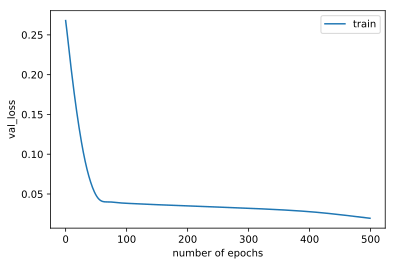

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

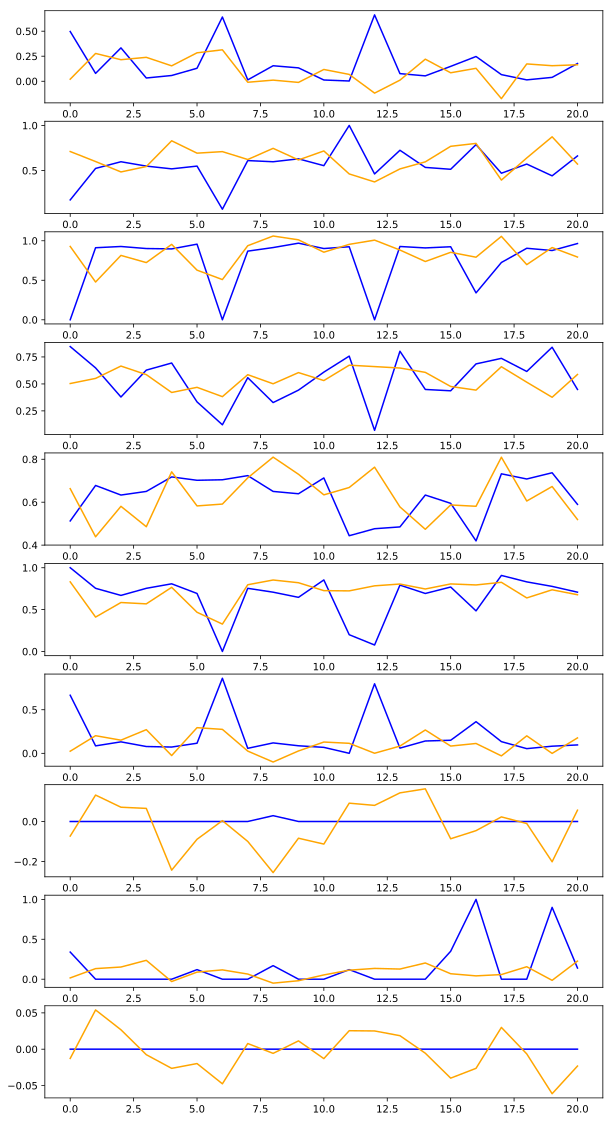

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 2.05876455e-02,  7.10755169e-01,  9.28266346e-01,
         5.03412664e-01,  6.63003504e-01,  8.31063569e-01,
         2.40318775e-02, -7.27990717e-02,  1.61983632e-02,
        -1.27296448e-02],
       [ 2.77706683e-01,  5.99768281e-01,  4.77818698e-01,
         5.50942540e-01,  4.38990861e-01,  4.10499126e-01,
         2.02132136e-01,  1.31639346e-01,  1.32808119e-01,
         5.39740846e-02],
       [ 2.15167135e-01,  4.84305233e-01,  8.14602375e-01,
         6.65299356e-01,  5.80808163e-01,  5.84358633e-01,
         1.50731623e-01,  7.11067468e-02,  1.52490407e-01,
         2.67035812e-02],
       [ 2.38900393e-01,  5.44275761e-01,  7.23915517e-01,
         5.85873663e-01,  4.85869020e-01,  5.68313777e-01,
         2.71527648e-01,  6.52501434e-02,  2.36419111e-01,
        -7.60669261e-03],
       [ 1.53932840e-01,  8.29875588e-01,  9.54326093e-01,
         4.20549601e-01,  7.41400898e-01,  7.65545189e-01,
        -2.56748646e-02, -2.42477342e-01, -2.91163810e-02,
        -2.

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

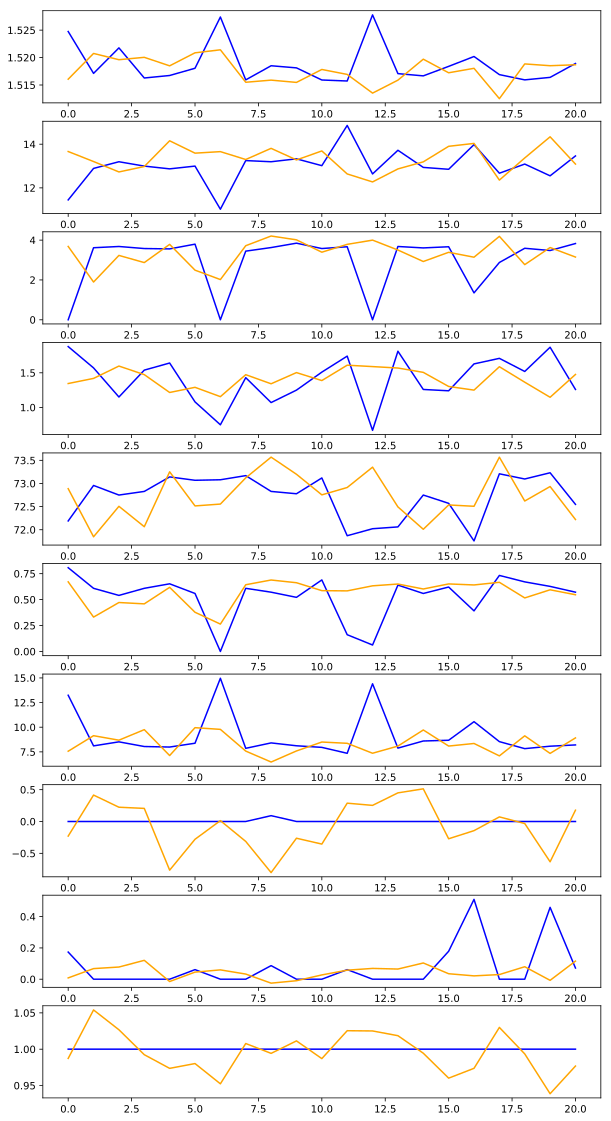

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 2.05876455e-02,  7.10755169e-01,  9.28266346e-01,
         5.03412664e-01,  6.63003504e-01,  8.31063569e-01,
         2.40318775e-02, -7.27990717e-02,  1.61983632e-02,
        -1.27296448e-02],
       [ 2.77706683e-01,  5.99768281e-01,  4.77818698e-01,
         5.50942540e-01,  4.38990861e-01,  4.10499126e-01,
         2.02132136e-01,  1.31639346e-01,  1.32808119e-01,
         5.39740846e-02],
       [ 2.15167135e-01,  4.84305233e-01,  8.14602375e-01,
         6.65299356e-01,  5.80808163e-01,  5.84358633e-01,
         1.50731623e-01,  7.11067468e-02,  1.52490407e-01,
         2.67035812e-02],
       [ 2.38900393e-01,  5.44275761e-01,  7.23915517e-01,
         5.85873663e-01,  4.85869020e-01,  5.68313777e-01,
         2.71527648e-01,  6.52501434e-02,  2.36419111e-01,
        -7.60669261e-03],
       [ 1.53932840e-01,  8.29875588e-01,  9.54326093e-01,
         4.20549601e-01,  7.41400898e-01,  7.65545189e-01,
        -2.56748646e-02, -2.42477342e-01, -2.91163810e-02,
        -2.

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)